### 1 : Carte des notes globales par arrondissement 

In [1]:
# Installation des modules et import des librairies nécessaires

!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install topojson
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd


  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-ph3e70q9
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-ph3e70q9
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5f9b1a'
  Running command git fetch -q https://github.com/inseefrlab/cartiflette 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Running command git checkout -q 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Resolved https://github.com/inseefrlab/cartiflette to commit 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Import des données géographiques des arrondissements parisiens depuis la librairie cartiflette

import cartiflette.s3 as s3

Arrondissements = s3.download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

AttributeError: module 'cartiflette.s3' has no attribute 'download_vectorfile_url_all'

In [3]:
# On conserve uniquement les colonnes nécessaires et tri des arrondissement dans l'ordre. 

Arrondissements = Arrondissements[['NOM','geometry', 'INSEE_COG']].sort_values('INSEE_COG')


# Ajout des notes globales des habitants.

notes = pd.read_excel("data/Notes_arrondissements.xlsx",  decimal=',')
notes_globales = notes['Note Globale'].values
Arrondissements['Note globale'] = notes_globales

NameError: name 'Arrondissements' is not defined

In [4]:
display(Arrondissements)

,NOM,geometry,INSEE_COG,Note globale
14,Paris 1er Arrondissement,"POLYGON ((2.34464 48.85409, 2.34411 48.85428, ...",75101,6.58
1,Paris 2e Arrondissement,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",75102,6.23
0,Paris 3e Arrondissement,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",75103,7.65
2,Paris 4e Arrondissement,"POLYGON ((2.36849 48.85580, 2.36873 48.85482, ...",75104,6.09
3,Paris 5e Arrondissement,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",75105,8.32
4,Paris 6e Arrondissement,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",75106,7.65
17,Paris 7e Arrondissement,"POLYGON ((2.31671 48.84686, 2.31638 48.84677, ...",75107,7.30
9,Paris 8e Arrondissement,"POLYGON ((2.32717 48.88346, 2.32716 48.88323, ...",75108,7.76
5,Paris 9e Arrondissement,"POLYGON ((2.32589 48.86958, 2.32597 48.87009, ...",75109,7.25
6,Paris 10e Arrondissement,"POLYGON ((2.36471 48.88437, 2.36527 48.88433, ...",75110,5.10


<Axes: >

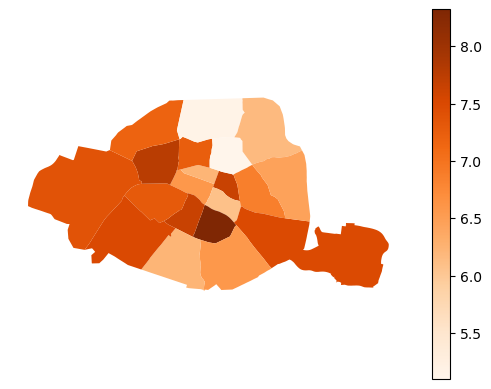

In [5]:
aplat = Arrondissements.plot(
    column = "Note globale", cmap="Oranges", legend=True)
aplat.set_axis_off()
aplat

### 2 : La culture et les lieux culturels

In [6]:
# Ajout des notes concernant la culture au dataframe Arrondissements

notes_culture = pd.read_excel("/home/onyxia/Projet_Python_2AENSAE/Notes_arrondissements.xlsx",  decimal=',')
notes_culture = notes_culture['Culture'].values
Arrondissements['Note culture'] = notes_culture

In [7]:
# Ajout du nombre de lieux culturels par arrondissements dans le dataframe Arrondissements

LieuxCulturels = pd.read_csv('/home/onyxia/Projet_Python_2AENSAE/lieux_culturels.csv')
LieuxCulturels.CODE_POSTAL = LieuxCulturels.CODE_POSTAL.astype(str)
LieuxCulturels.CODE_POSTAL = LieuxCulturels.CODE_POSTAL.str.replace('.0','')
LieuxCulturels.drop(LieuxCulturels[LieuxCulturels.CODE_POSTAL == 'nan'].index, inplace=True)
NbLieux = LieuxCulturels.CODE_POSTAL.value_counts()
NbLieux = NbLieux.sort_index()

Arrondissements['Nb_lieux_culturels'] = NbLieux.values

Carte représentant le nombre de lieux culturels par arrondissement :

Text(0.5, 1.0, 'Note attribuée à la culture par les habitants')

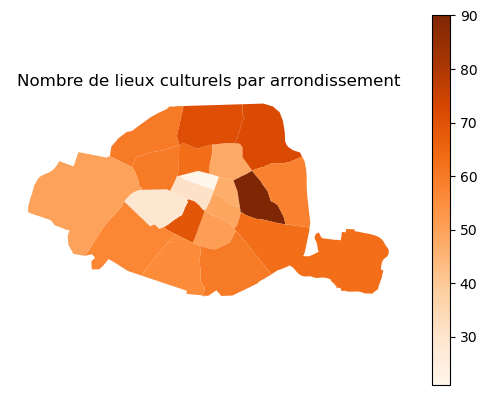

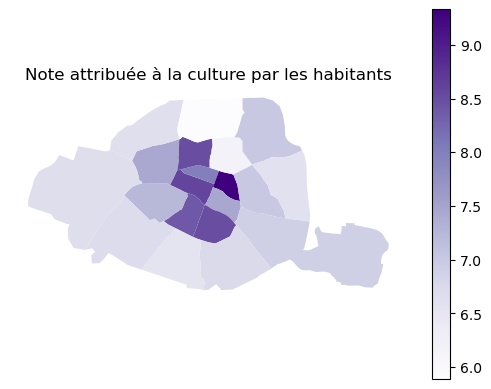

In [8]:
aplat = Arrondissements.plot(
    column = "Nb_lieux_culturels", cmap="Oranges", legend=True)
aplat.set_axis_off()
aplat.set_title("Nombre de lieux culturels par arrondissement")
aplat2 = Arrondissements.plot(
    column = "Note culture", cmap="Purples", legend=True)
aplat2.set_axis_off()
aplat2.set_title("Note attribuée à la culture par les habitants")

On voit ici une certaine absence de corrélation entre la satisfaction des habitants et le nombre réel de lieux culturels par arrondissement.
Le nombre de lieux culturels par mètre carré est peut-être une variable plus pertinente que simplement le nombre de lieux culturels par arrondissement. De cette manière, on s'intéresse à la densité de la culture par quartier. Voyons si cette nouvelle variable est davantage corrélée aux avis des habitants.